In [1]:
%matplotlib inline
import logging
import Euclid
import matplotlib.pyplot as plt
import numpy as np

from collections import namedtuple
from glob import glob
from matplotlib import colors
from astropy.table import Table
from tqdm.notebook import tqdm
from scipy.stats import gaussian_kde

%elogin
%erun PHZ_NNPZ 0.9

%load_ext autoreload
%autoreload 2
from nnpz.reference_sample.ReferenceSample import ReferenceSample

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
ref_sample = ReferenceSample('/home/aalvarez/Work/Data/SC8/PHZ_Calibration/MergeReferenceSampleDirs/reference_sample_dir.dir/')

# Visualization of the reference sample

In [3]:
obj_ids = ref_sample.getIds()

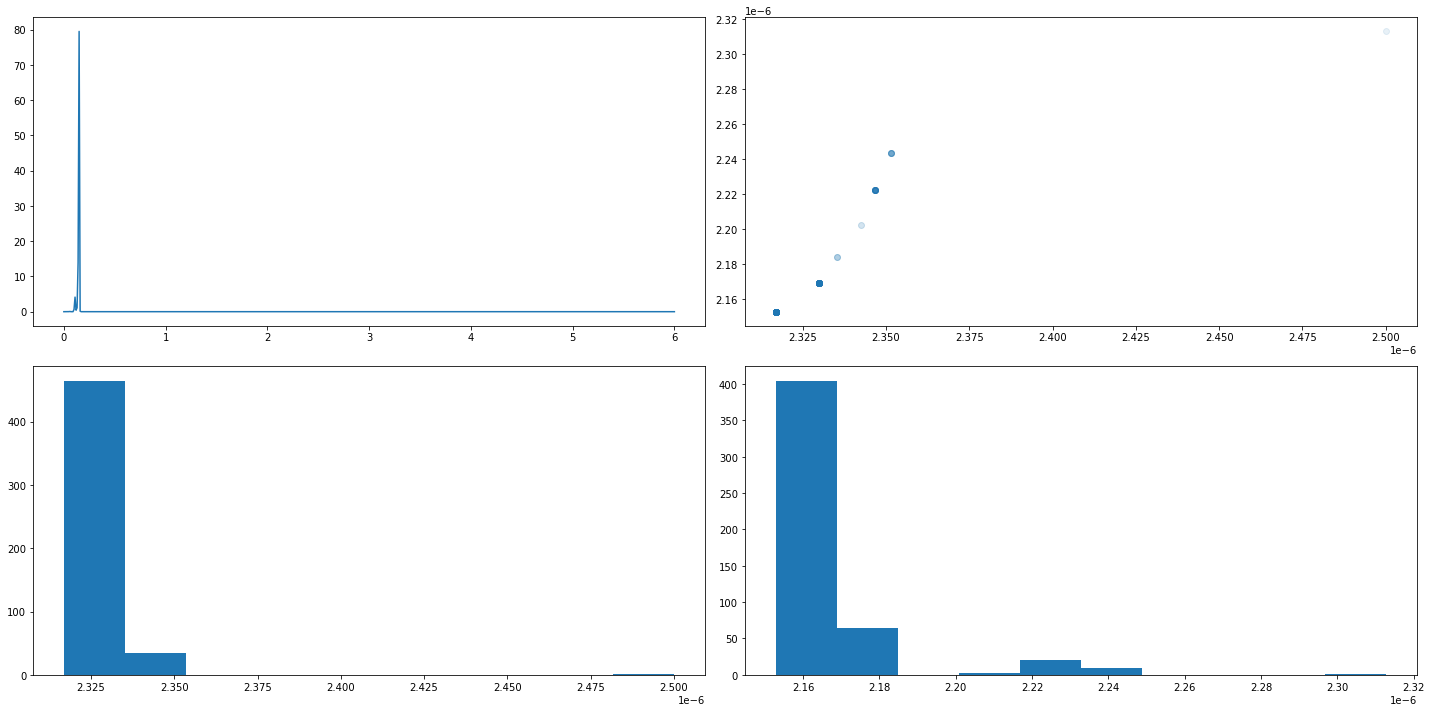

In [4]:
pdz = ref_sample.getPdzData(obj_ids[550])
pp = ref_sample.getPhysicalParameters(obj_ids[550])

fig, axes = plt.subplots(ncols=2, nrows=2)
axes[0, 0].plot(pdz[:,0], pdz[:,1])
axes[0, 1].scatter(pp[:,0], pp[:,1], alpha=0.1)
axes[1, 0].hist(pp[:,0])
axes[1, 1].hist(pp[:,1])
plt.tight_layout()

# For a given target object

In [5]:
target = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/Nnpz/output_file.fits', hdu=1)
bins = Table.read('/home/aalvarez/Work/Data/SC8/PHZ_Prod/Nnpz/output_file.fits', hdu=2)

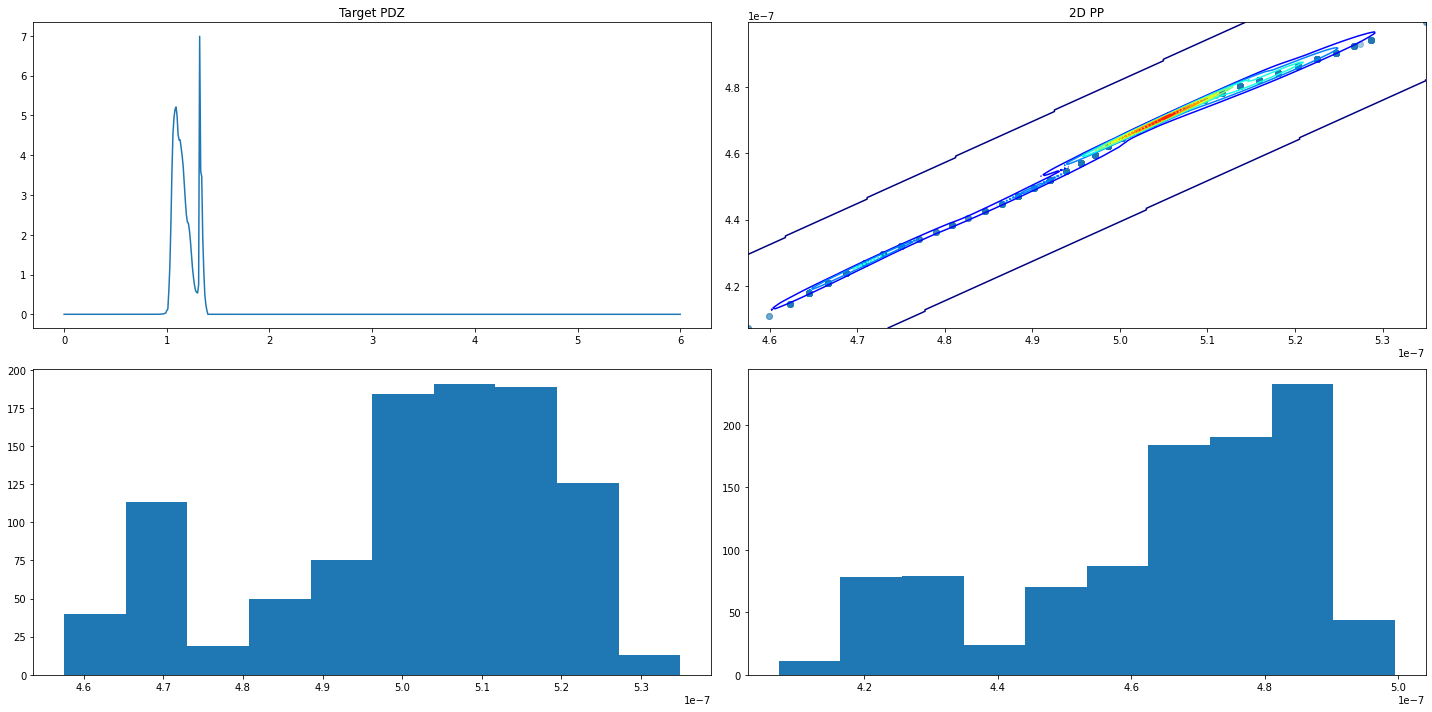

In [14]:
target_obj = target[100]

fig, axes = plt.subplots(ncols=2, nrows=2)
axes[0, 0].plot(bins['BINS_PDF'], target_obj['REDSHIFT_PDF'])
axes[0, 0].set_title('Target PDZ')

tw = np.sum(target_obj['NEIGHBOR_WEIGHTS'])
re_pdz = np.zeros(bins['BINS_PDF'].shape)
all_samples = []
for n, w in zip(target_obj['NEIGHBOR_IDS'], target_obj['NEIGHBOR_WEIGHTS']):
    all_samples.append(ref_sample.getPhysicalParameters(n))

all_weights = np.repeat(target_obj['NEIGHBOR_WEIGHTS'], all_samples[0].shape[0])
all_samples = np.concatenate(all_samples)

choice = np.random.choice(len(all_samples), size=1000, p=all_weights/np.sum(all_weights))

axes[1, 0].hist(all_samples[choice, 0])
axes[1, 1].hist(all_samples[choice, 1])

axes[0, 1].scatter(all_samples[choice,0], all_samples[choice,1], alpha=0.4)

kde = gaussian_kde(all_samples[choice].T)
xmin, xmax = all_samples[choice,0].min(), all_samples[choice,0].max()
ymin, ymax = all_samples[choice,1].min(), all_samples[choice,1].max()
X, Y = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)
axes[0, 1].contour(X, Y, Z, cmap='jet')
axes[0, 1].set_title('2D PP')

plt.tight_layout()